In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cx_Oracle

from matplotlib import rc    # 기본 폰트 설정
rc('font', family='Malgun Gothic')

import warnings
warnings.filterwarnings('ignore')

db = cx_Oracle.connect('c##lm', 'lm', 'localhost:1521/xe')
cursor = db.cursor()

In [ ]:
cursor.execute('''
SELECT 유형, COUNT(*),SUM("14,15년총구매금액"), SUM("총증감액")
FROM DEMOPURPROD
GROUP BY 유형
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [9]:
cursor.execute('''
select 대그룹, COUNT(*), SUM("14,15년총구매금액"), SUM("8분기-1분기")  
FROM QUA_AMT
GROUP BY 대그룹
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [10]:
df

,대그룹,COUNT(*),"SUM(""14,15년총구매금액"")","SUM(""8분기-1분기"")"
0,증가고객,9922,379048559066,3.605871e+10
1,감소고객,9461,297970597875,-2.337530e+10


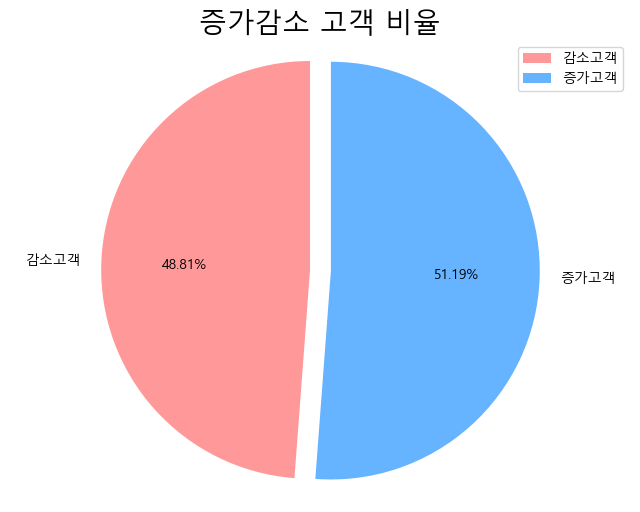

In [12]:
import matplotlib.pyplot as plt

# 그래프 데이터 생성
df_g = df.groupby('대그룹').sum()

# 파이 차트 설정
labels = df_g.index
sizes = df_g['COUNT(*)']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)
plt.title('증가감소 고객 비율', size=20)
plt.axis('equal')
plt.legend(labels=labels, loc='best')

# 그래프 출력
plt.show()


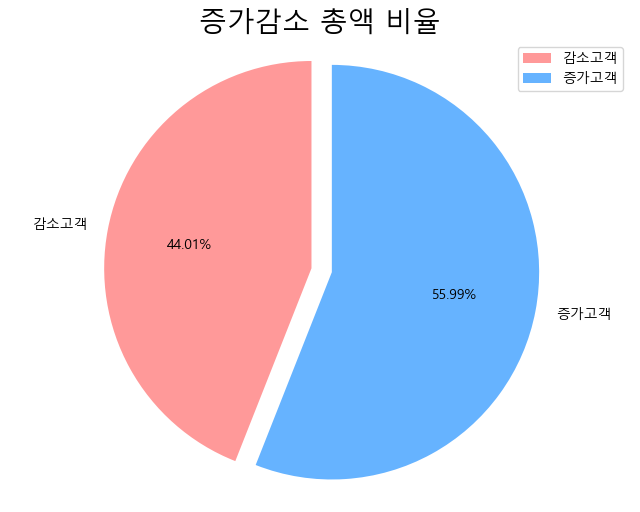

In [13]:
import matplotlib.pyplot as plt

# 그래프 데이터 생성
df_g = df.groupby('대그룹').sum()

# 파이 차트 설정
labels = df_g.index
sizes = df_g['SUM("14,15년총구매금액")']
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# 파이 차트 그리기
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, explode=explode)
plt.title('증가감소 총액 비율', size=20)
plt.axis('equal')
plt.legend(labels=labels, loc='best')

# 그래프 출력
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 총액 금액 계산
plus_total_amount = plus_df['구매금액'].sum()
minus_total_amount = minus_df['구매금액'].sum()

# 파이 차트 설정
labels = ['플러스 고객\n({:,})'.format(plus_total_amount), 
          '마이너스 고객\n({:,})'.format(minus_total_amount)]
sizes = [plus_total_amount, minus_total_amount]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# 매출액 파이 차트
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')
plt.title('플러스와 마이너스 고객 매출액')

plt.tight_layout()
plt.show()

In [61]:
cursor.execute('''
SELECT 유형, SUM("14년도1분기"), SUM("15년도4분기")
FROM AAAA
GROUP BY 유형
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [62]:
df

,유형,"SUM(""14년도1분기"")","SUM(""15년도4분기"")"
0,증가고객,32678037662,70037906829
1,감소고객,46656150216,24804097007


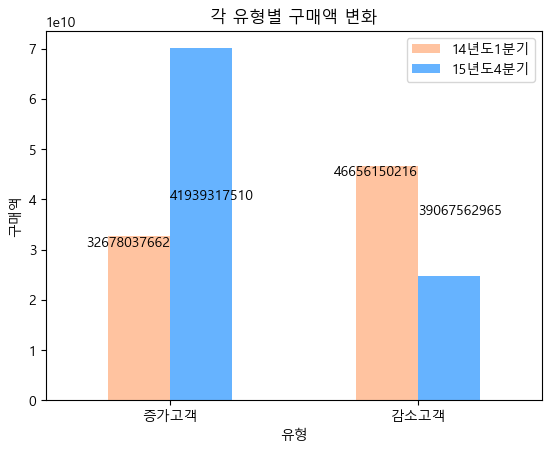

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data)

# 파스텔 색상 설정
colors = ['#FFC3A0', '#66b3ff']

# 그래프 그리기
ax = df.plot(x='유형', y=['14년도1분기', '15년도4분기'], kind='bar', rot=0, color=colors)


for i, v in enumerate(df.values):
    ax.text(i, v[1], str(v[1]), ha='right', va='top')  # 14년도1분기 값 표시
    ax.text(i, v[2], str(v[2]), ha='left', va='top')  # 15년도4분기 값 표시
    
# 축 및 제목 설정
plt.xlabel('유형')
plt.ylabel('구매액')
plt.title('각 유형별 구매액 변화')
plt.xticks(rotation=0)


# 범례 표시
plt.legend()

plt.show()


In [65]:
cursor.execute('''
SELECT 유형, SUM("14년도1분기"),SUM("14년도2분기"),SUM("14년도3분기"),SUM("14년도4분기"),SUM("15년도1분기"), SUM("15년도2분기"),SUM("15년도3분기"),SUM("15년도4분기")
FROM AAAA
GROUP BY 유형
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [57]:
df

,유형,"SUM(""14년도1분기"")","SUM(""14년도2분기"")","SUM(""14년도3분기"")","SUM(""14년도4분기"")","SUM(""15년도1분기"")","SUM(""15년도2분기"")","SUM(""15년도3분기"")","SUM(""15년도4분기"")"
0,증가고객,32678037662,41939317510,41968662768,54688361446,49612336047,52456952083,50753226691,70037906829
1,감소고객,46656150216,39067562965,34616008043,38056340487,35728518927,32863176762,30518337884,24804097007


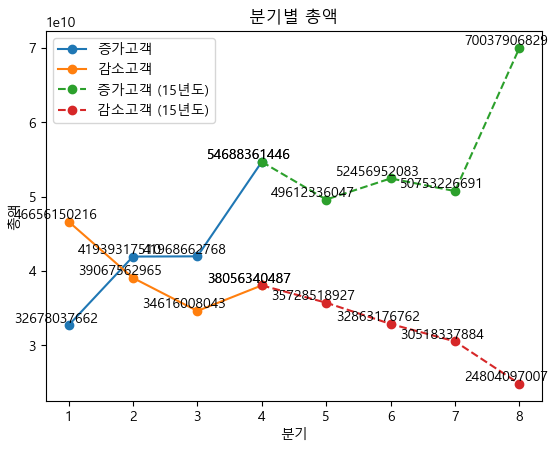

In [79]:
x = range(1, 9)  # 분기별 x 좌표
plt.plot(x[:4], df.iloc[0, 1:5], label=df.iloc[0, 0], marker='o')  # 증가고객 데이터
plt.plot(x[:4], df.iloc[1, 1:5], label=df.iloc[1, 0], marker='o')  # 감소고객 데이터
plt.plot(x[3:], df.iloc[0, 4:], label=df.iloc[0, 0] + ' (15년도)', marker='o', linestyle='dashed')  # 증가고객 (15년도) 데이터
plt.plot(x[3:], df.iloc[1, 4:], label=df.iloc[1, 0] + ' (15년도)', marker='o', linestyle='dashed')  # 감소고객 (15년도) 데이터

# 데이터 포인트에 값을 표시
for i in range(2):
    for j in range(4):
        plt.text(x[j] - 0.2, df.iloc[i, j + 1], str(df.iloc[i, j + 1]), ha='center', va='bottom')
    for j in range(3, 8):
        plt.text(x[j] - 0.2, df.iloc[i, j + 1], str(df.iloc[i, j + 1]), ha='center', va='bottom')

# 축 및 제목 설정
plt.xlabel('분기')
plt.ylabel('총액')
plt.title('분기별 총액')

# 범례 표시
plt.legend()

# 그래프 출력
plt.show()


In [27]:
cursor.execute('''
SELECT 대그룹, SUM("14년도1분기"), SUM("15년도4분기")
FROM QUA_AMT
GROUP BY 대그룹
''')
x = cursor.fetchall()
col_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(x, columns=col_names)

In [29]:
df

,대그룹,"SUM(""14년도1분기"")","SUM(""15년도4분기"")"
0,증가고객,3.141832e+10,6.747703e+10
1,감소고객,4.805284e+10,2.467753e+10
